In [12]:
# --------- 📁 Upload du fichier CSV ---------
from google.colab import files
import pandas as pd

uploaded = files.upload()

# Lire le fichier
for fn in uploaded.keys():
    df = pd.read_csv(fn)

print("Aperçu des données :")
print(df.head())

Saving exemple_multiclass.csv to exemple_multiclass.csv
Aperçu des données :
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  label
0  -1.700205  -1.473999  -2.535051   0.528303   1.253434   2.551572      2
1   0.686566   0.035776  -2.029799  -2.213227  -1.119581   1.629083      1
2  -1.450712  -0.560287  -0.285550  -0.316753   0.787103   0.106782      2
3  -1.327716   0.437633  -1.304278  -0.015820  -0.554738   0.996065      1
4  -0.432532  -1.309829  -0.569965   1.327078  -1.073693   0.049719      0


In [13]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,label
0,-1.700205,-1.473999,-2.535051,0.528303,1.253434,2.551572,2
1,0.686566,0.035776,-2.029799,-2.213227,-1.119581,1.629083,1
2,-1.450712,-0.560287,-0.285550,-0.316753,0.787103,0.106782,2
3,-1.327716,0.437633,-1.304278,-0.015820,-0.554738,0.996065,1
4,-0.432532,-1.309829,-0.569965,1.327078,-1.073693,0.049719,0


In [14]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,label
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,-0.012828,-0.916522,-1.058856,-0.007675,-0.371773,0.366535,1.010000
std,0.923242,0.985257,1.439444,1.006005,1.378485,1.363128,0.819842
min,-2.714107,-3.548845,-5.703085,-3.351611,-3.666140,-4.075389,0.000000
25%,-0.595367,-1.559853,-2.031933,-0.702072,-1.281966,-0.306296,0.000000
50%,-0.013494,-1.031027,-0.964858,0.037637,-0.332211,0.546611,1.000000
75%,0.665332,-0.358502,-0.106712,0.687379,0.518922,1.308115,2.000000
max,2.199527,3.677730,3.212390,2.699714,3.103991,3.301141,2.000000


In [15]:
# --------- ⚙️ Imports et fonctions utilitaires ---------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

def preprocess_data(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    if y.dtype == 'object':
        y = pd.factorize(y)[0]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Prédictions")
    plt.ylabel("Vraies valeurs")
    plt.title("Matrice de confusion")
    plt.show()

def train_model(model_name, X_train, X_test, y_train, y_test):
    if model_name == 'regression':
        model = LinearRegression()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        mse = mean_squared_error(y_test, preds)
        print(f"Mean Squared Error: {mse:.4f}")
        plt.scatter(y_test, preds)
        plt.xlabel("Vraies valeurs")
        plt.ylabel("Prédictions")
        plt.title("Régression : Vraies vs Prédictions")
        plt.show()

    elif model_name == 'svm':
        model = SVC()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        print("Rapport de classification :")
        print(classification_report(y_test, preds))
        plot_confusion_matrix(y_test, preds)

    elif model_name == 'random_forest':
        model = RandomForestClassifier(n_estimators=100)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        print("Rapport de classification :")
        print(classification_report(y_test, preds))
        plot_confusion_matrix(y_test, preds)

    else:
        print("Modèle non reconnu.")

Rapport de classification :
              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.68      0.94      0.79        18
           2       0.80      0.71      0.75        17

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.83      0.80      0.80        60



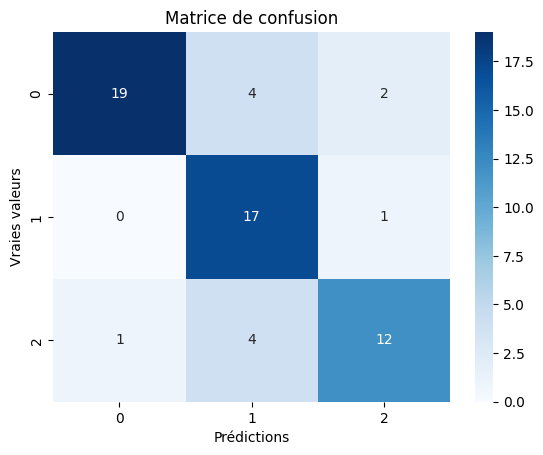

In [16]:
# --------- 🚀 Lancement de l'entraînement ---------
# Renseigne ici le nom de la colonne cible de ton dataset
# Replace 'nom_colonne_cible' with the actual target column name from your data
target_column = 'label'  # ex : 'label', 'price', etc.

# Choisir un modèle : 'regression', 'svm' ou 'random_forest'
model_choice = 'random_forest'

# Prétraitement et entraînement
X_train, X_test, y_train, y_test = preprocess_data(df, target_column)
train_model(model_choice, X_train, X_test, y_train, y_test)